In [1]:
%pip install shap


  Using cached shap-0.46.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (540 kB)
  Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
  Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
  Using cached llvmlite-0.43.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 10.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import shap
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


/home/henrique/workspace/lime-and-shap-for-explanaible/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:

explainer = shap.TreeExplainer(model)


In [ ]:

i = 1  
instance = X_test.iloc[i]


shap_values = explainer.shap_values(instance)


print("Valores SHAP para cada classe:", shap_values)


Valores SHAP para cada classe: [[-0.03137525  0.03394137 -0.00256613]
 [ 0.03574331 -0.02275596 -0.01298735]
 [ 0.3246542  -0.15594843 -0.16870578]
 [ 0.3336444  -0.19782032 -0.13582408]]


In [ ]:
classe_escolhida = 0 
shap.initjs()
shap.force_plot(explainer.expected_value[classe_escolhida], shap_values[classe_escolhida], instance)


DimensionError: Length of features is not equal to the length of shap_values!

In [12]:
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl (199.0 MB)

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


 97%|=================== | 3988/4128 [00:15<00:00]       

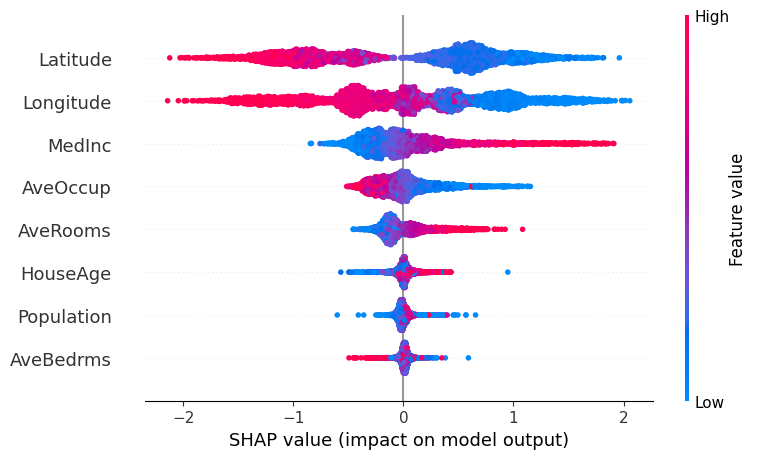

In [14]:
import shap
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)
